In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [5]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv('magic04.data', names = cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [6]:
df["class"] = (df["class"] == "g").astype(int)

In [7]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

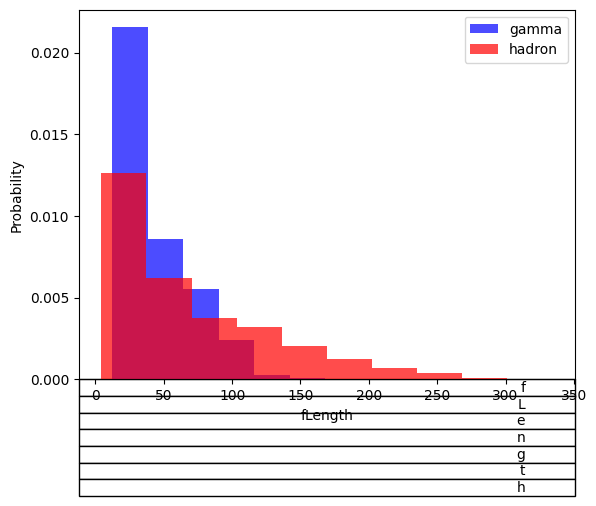

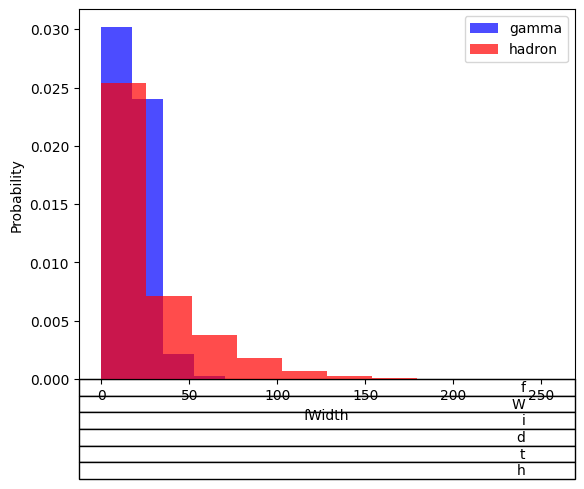

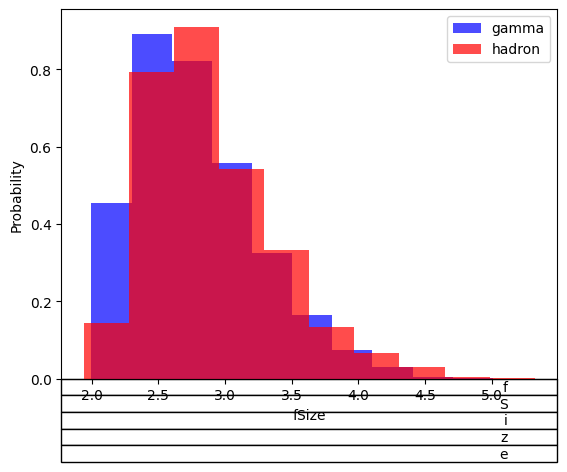

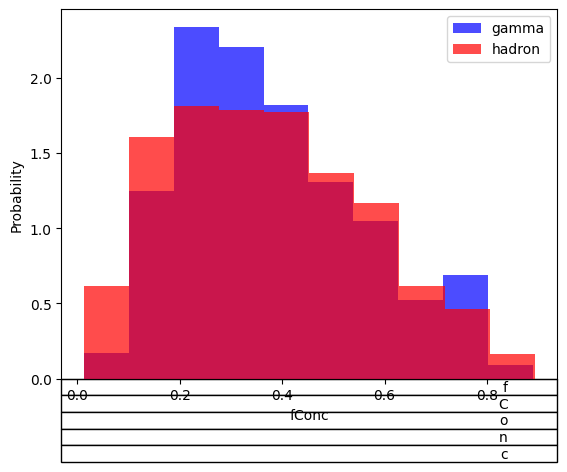

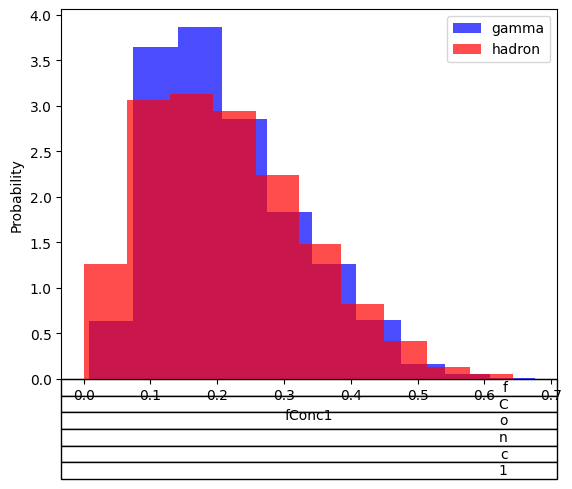

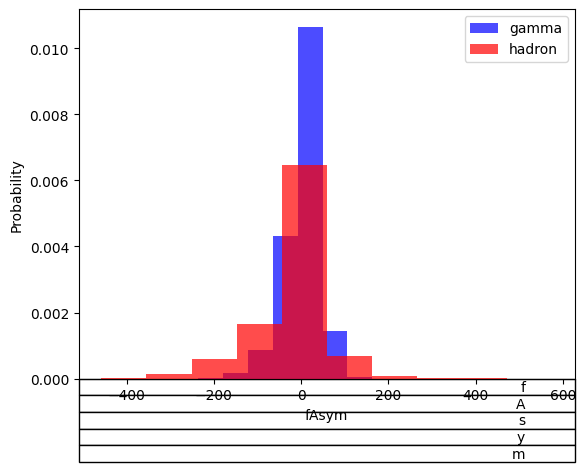

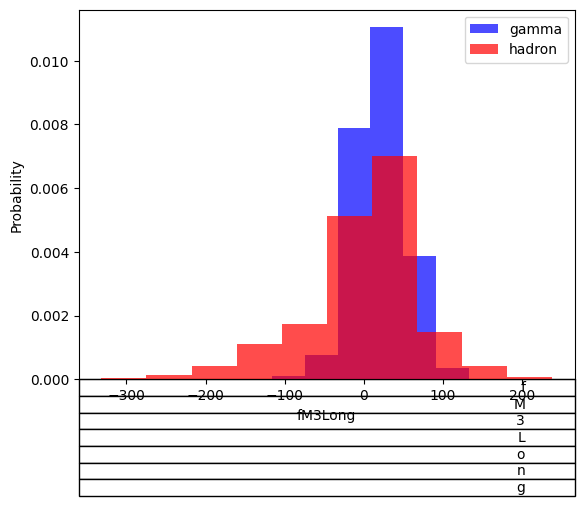

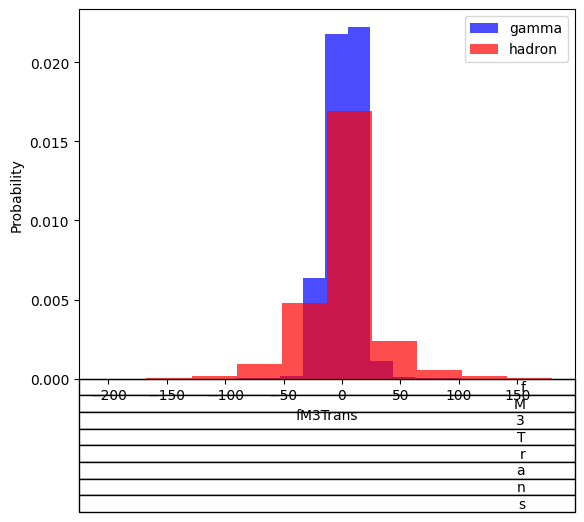

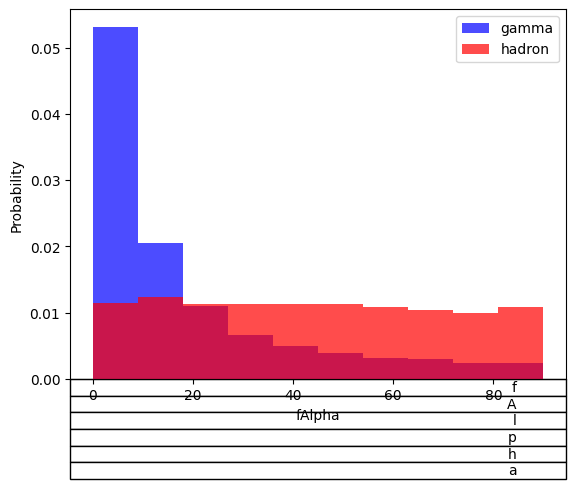

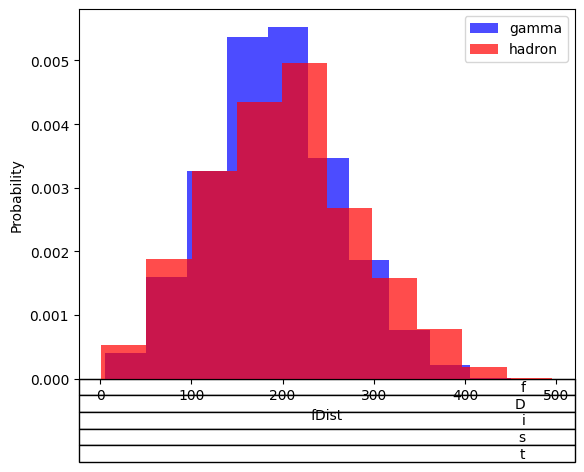

In [8]:
for label in cols[:-1]:
  plt.hist(df[df["class"] == 1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df["class"] == 0][label], color='red', label='hadron', alpha=0.7, density=True)
  plt.table(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()


#Train validation, test datasets

In [9]:
train, valid, test = np.split(
    df.sample(frac=1),
    [int(0.6 * len(df)), int(0.8 * len(df))]
)
train_df, valid_df, test_df = np.split(
    df.sample(frac=1),
    [int(0.6 * len(df)), int(0.8 * len(df))]
)


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [10]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y


In [11]:
train, X_train, y_train = scale_dataset(train_df, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid_df, oversample=False)
test, X_test, y_test = scale_dataset(test_df, oversample=False)

kNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [13]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
y_pred = knn_model.predict(X_test)

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1315
           1       0.86      0.86      0.86      2489

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



Naive Bayes

In [16]:
from sklearn.naive_bayes import GaussianNB

In [17]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [18]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.41      0.51      1315
           1       0.74      0.90      0.81      2489

    accuracy                           0.73      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.72      0.73      0.71      3804



In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [21]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.73      0.70      1315
           1       0.85      0.82      0.84      2489

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



SVM

In [22]:
from sklearn.svm import SVC

In [23]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [24]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1315
           1       0.90      0.91      0.90      2489

    accuracy                           0.87      3804
   macro avg       0.86      0.86      0.86      3804
weighted avg       0.87      0.87      0.87      3804



Neural net

In [25]:
import tensorflow as tf

In [26]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2)
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax1.grid(True)

  plt.show()

In [28]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(
      optimizer=tf.keras.optimizers.Adam(lr), #learning rate
      loss='binary_crossentropy',
      metrics=['accuracy']
  )

  history = nn_model.fit(
      X_train, y_train,
      epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose = 0
  )

  return nn_model, history


16 nn, dropout 0, lr 0.01, batch size 32


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


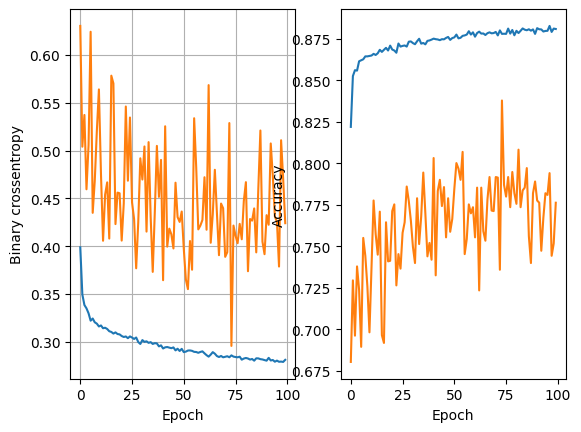

16 nn, dropout 0, lr 0.01, batch size 64


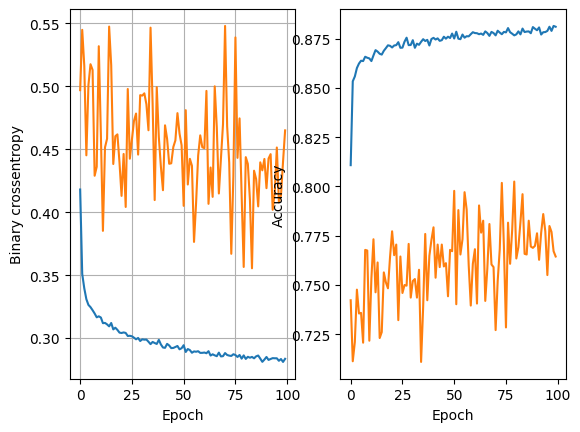

16 nn, dropout 0, lr 0.01, batch size 128


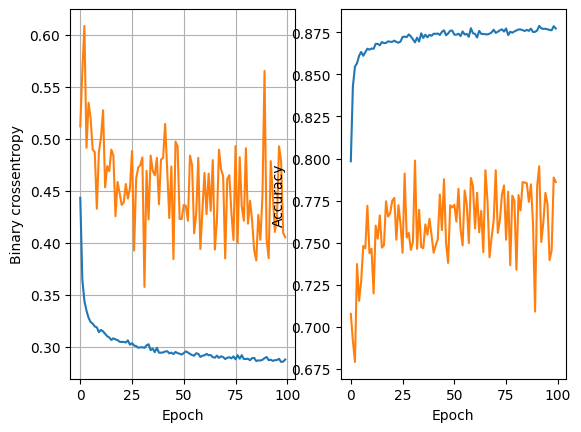

16 nn, dropout 0, lr 0.005, batch size 32


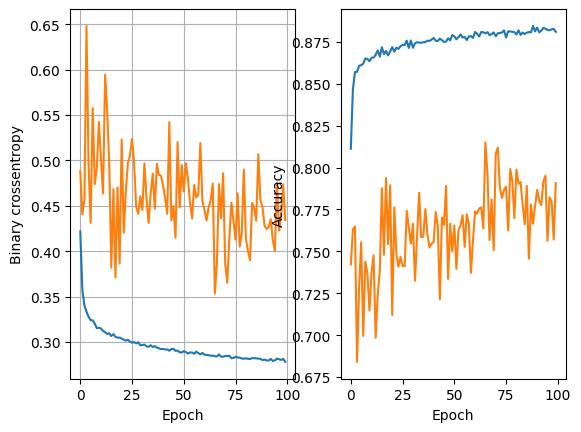

16 nn, dropout 0, lr 0.005, batch size 64


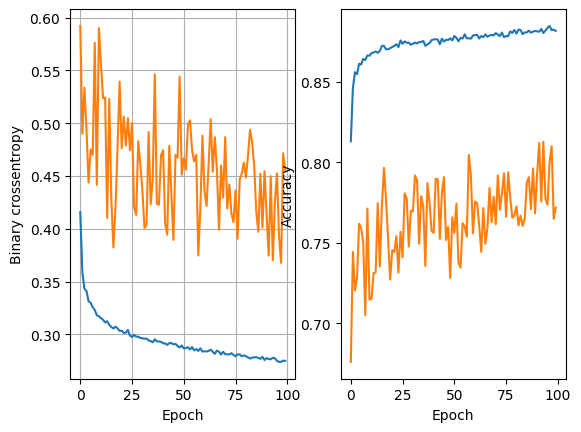

16 nn, dropout 0, lr 0.005, batch size 128


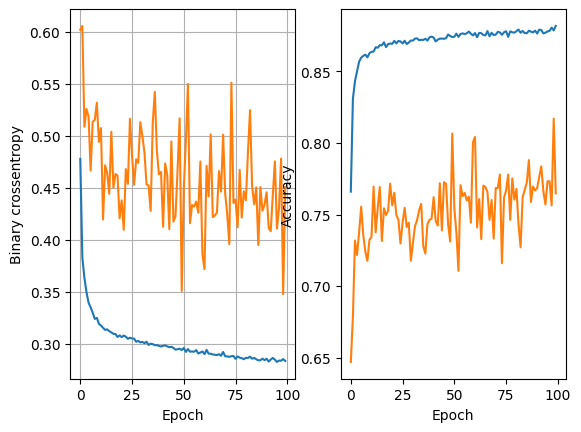

16 nn, dropout 0, lr 0.001, batch size 32


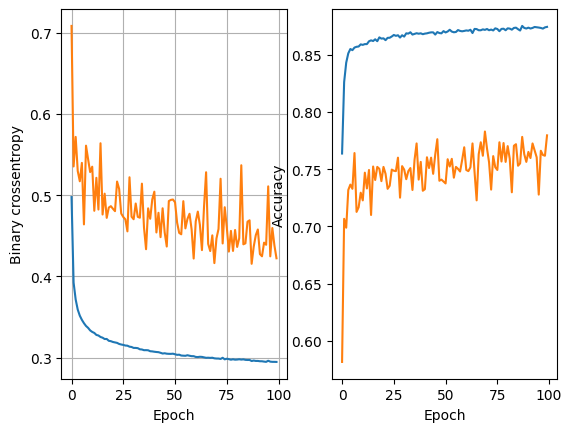

16 nn, dropout 0, lr 0.001, batch size 64


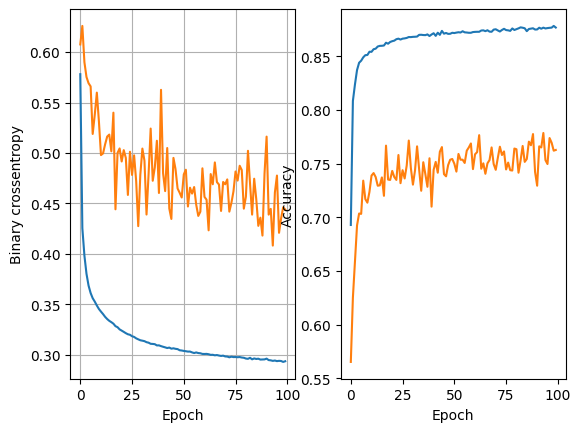

16 nn, dropout 0, lr 0.001, batch size 128


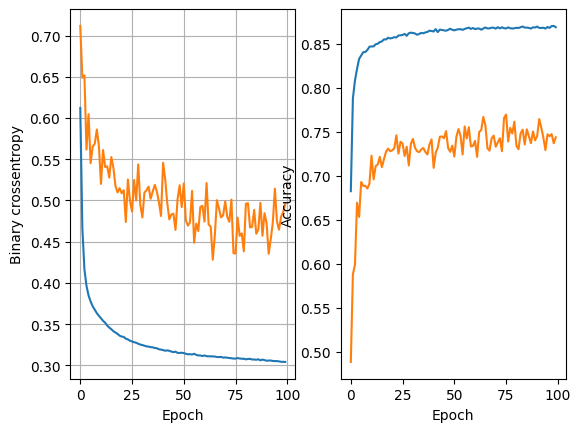

16 nn, dropout 0.2, lr 0.01, batch size 32


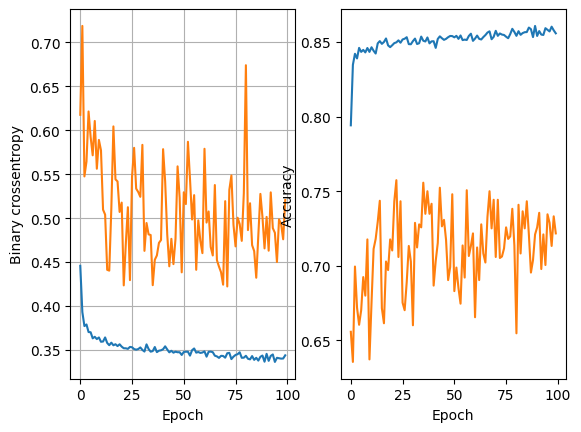

16 nn, dropout 0.2, lr 0.01, batch size 64


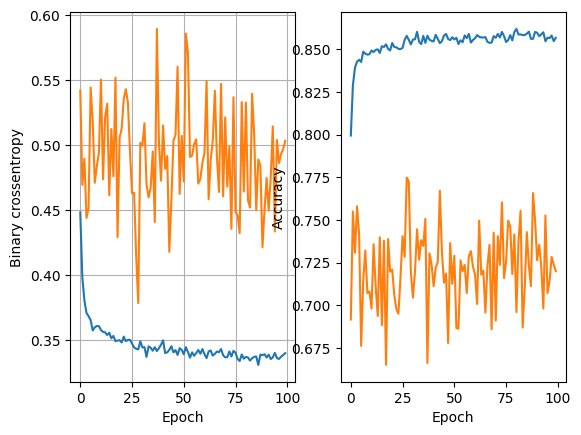

16 nn, dropout 0.2, lr 0.01, batch size 128


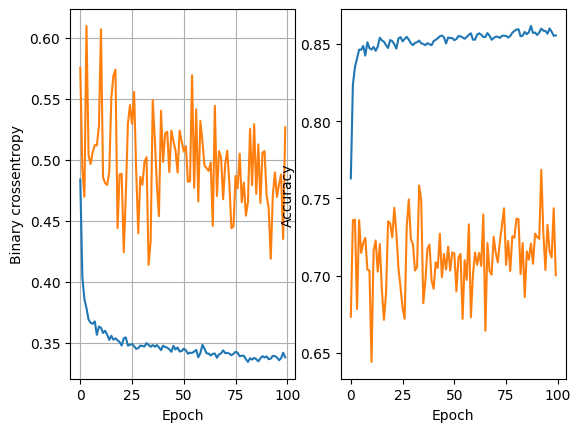

16 nn, dropout 0.2, lr 0.005, batch size 32


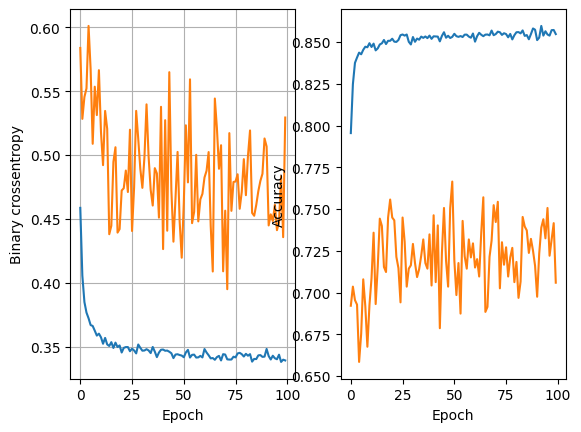

16 nn, dropout 0.2, lr 0.005, batch size 64


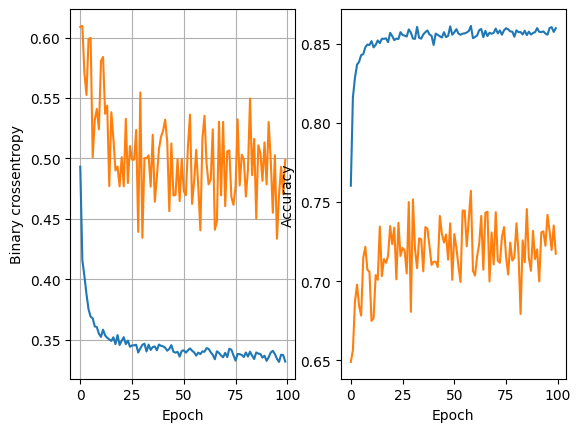

16 nn, dropout 0.2, lr 0.005, batch size 128


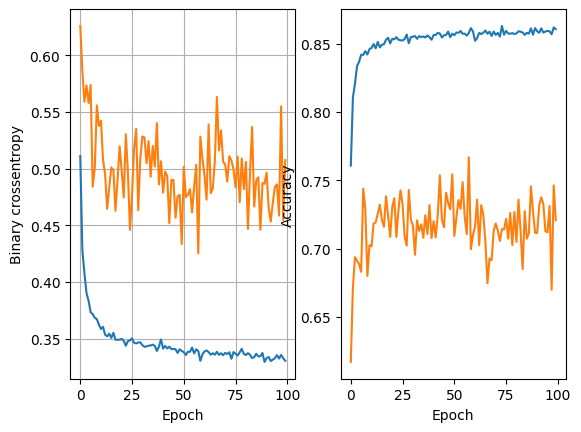

16 nn, dropout 0.2, lr 0.001, batch size 32


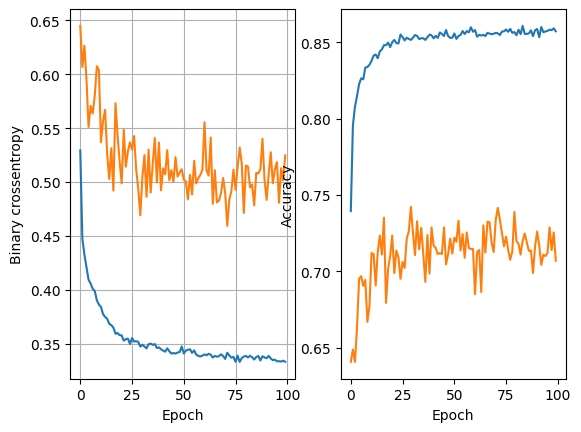

16 nn, dropout 0.2, lr 0.001, batch size 64


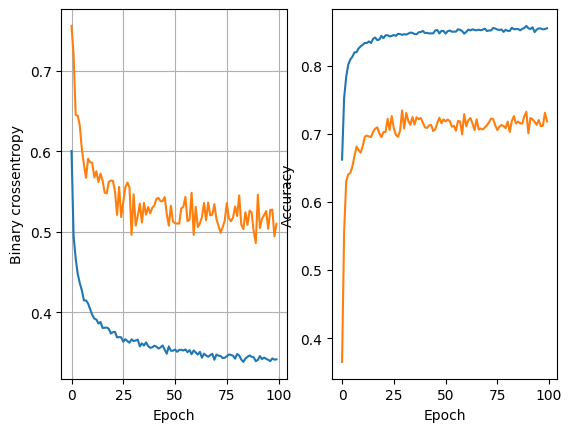

16 nn, dropout 0.2, lr 0.001, batch size 128


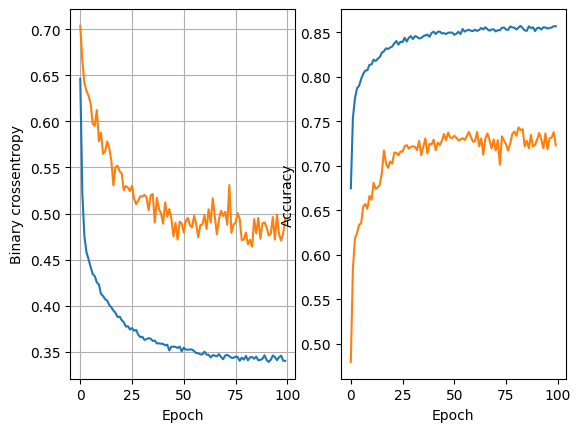

32 nn, dropout 0, lr 0.01, batch size 32


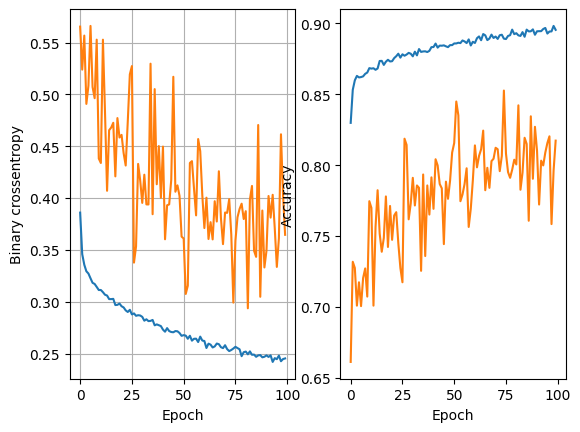

32 nn, dropout 0, lr 0.01, batch size 64


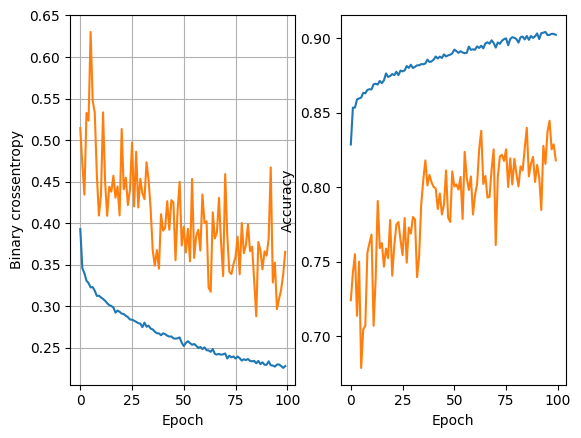

32 nn, dropout 0, lr 0.01, batch size 128


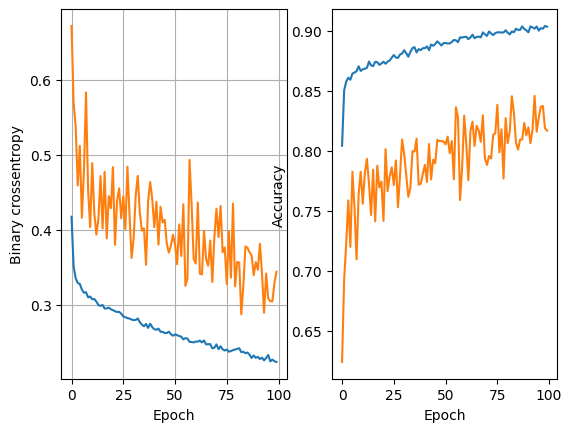

32 nn, dropout 0, lr 0.005, batch size 32


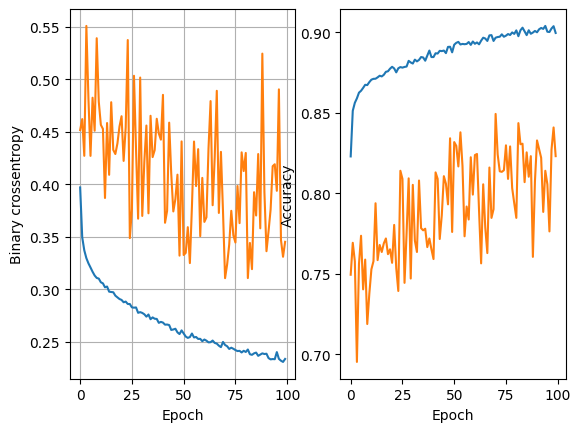

32 nn, dropout 0, lr 0.005, batch size 64


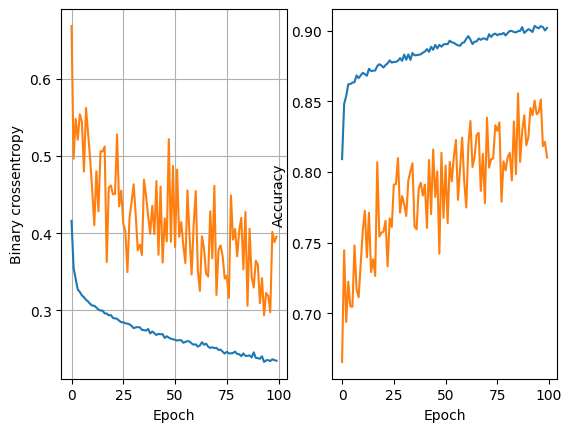

32 nn, dropout 0, lr 0.005, batch size 128


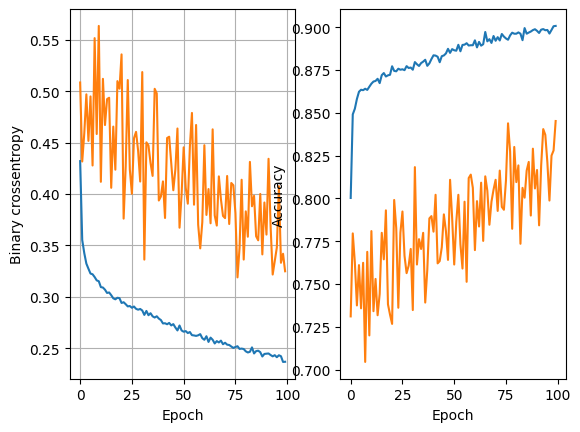

32 nn, dropout 0, lr 0.001, batch size 32


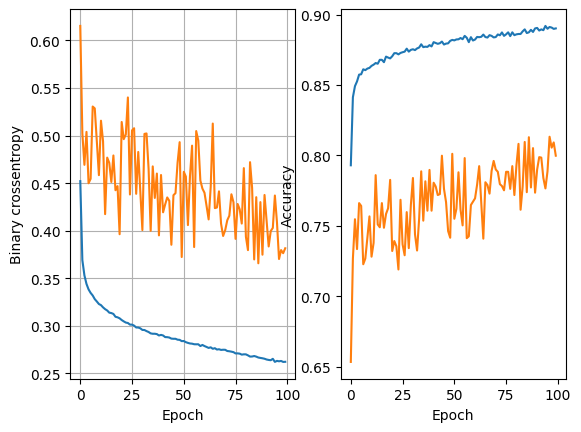

32 nn, dropout 0, lr 0.001, batch size 64


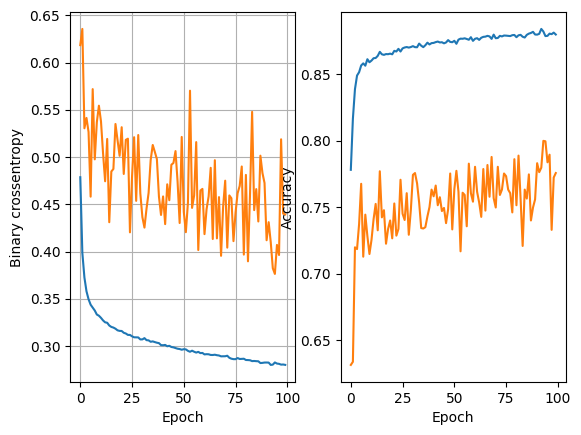

32 nn, dropout 0, lr 0.001, batch size 128


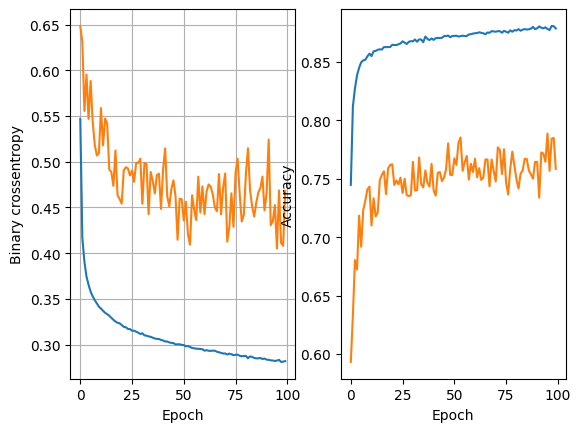

32 nn, dropout 0.2, lr 0.01, batch size 32


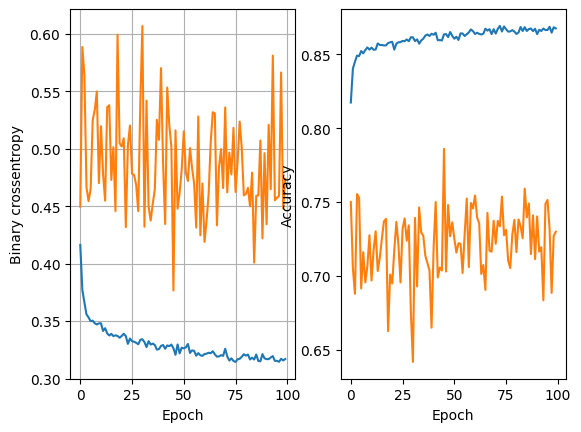

32 nn, dropout 0.2, lr 0.01, batch size 64


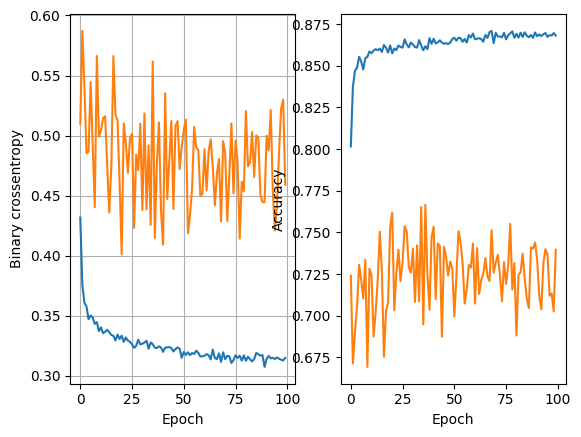

32 nn, dropout 0.2, lr 0.01, batch size 128


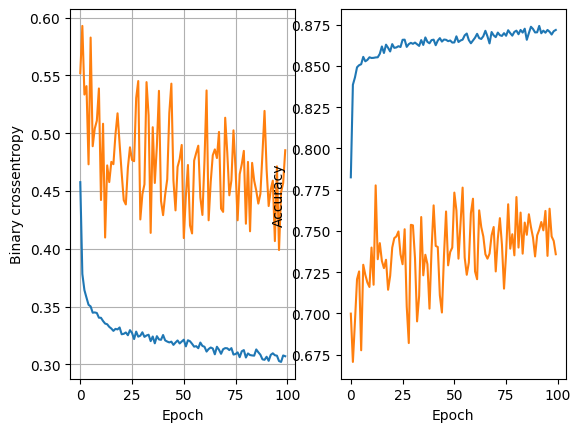

32 nn, dropout 0.2, lr 0.005, batch size 32


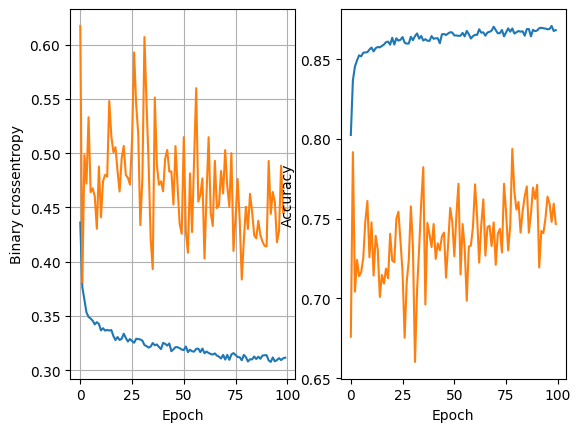

32 nn, dropout 0.2, lr 0.005, batch size 64


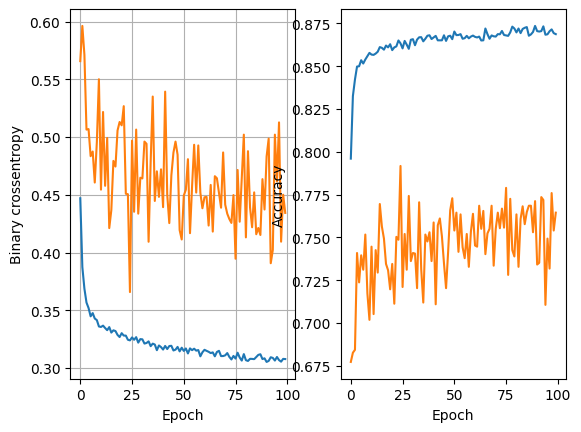

32 nn, dropout 0.2, lr 0.005, batch size 128


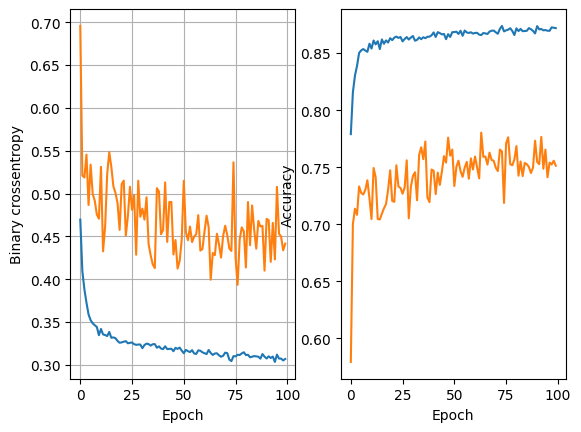

32 nn, dropout 0.2, lr 0.001, batch size 32


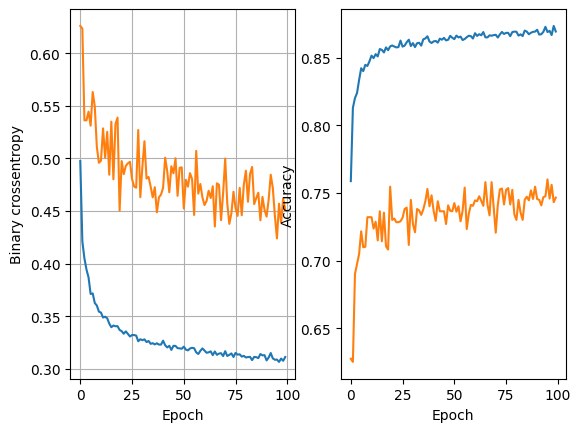

32 nn, dropout 0.2, lr 0.001, batch size 64


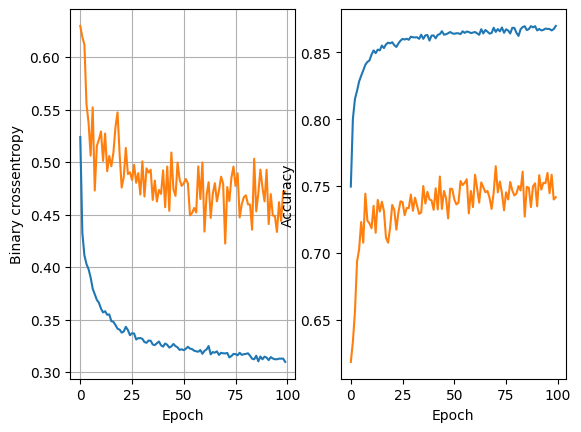

32 nn, dropout 0.2, lr 0.001, batch size 128


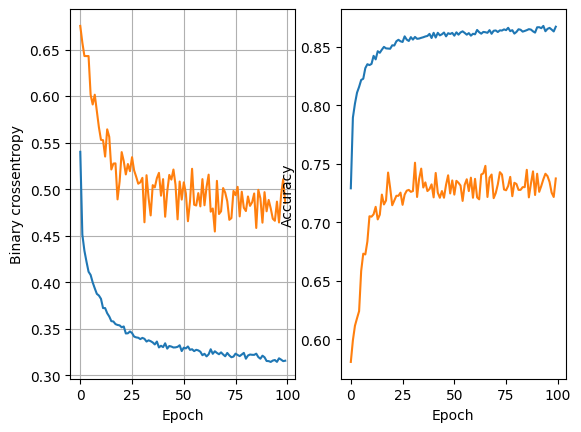

64 nn, dropout 0, lr 0.01, batch size 32


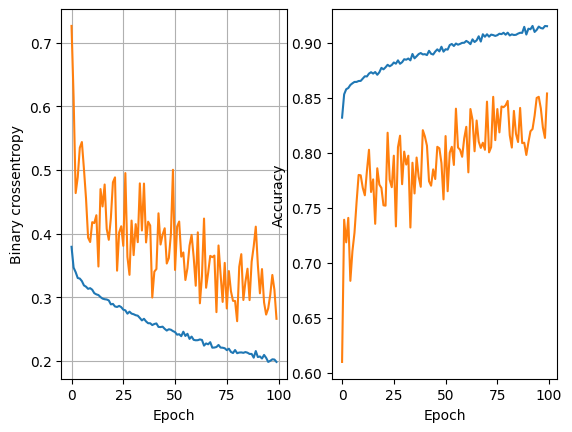

64 nn, dropout 0, lr 0.01, batch size 64


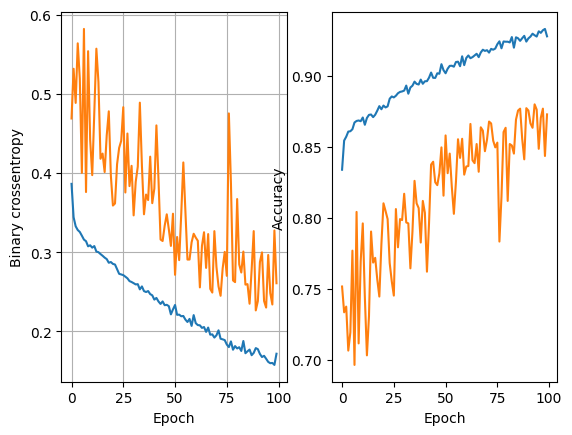

64 nn, dropout 0, lr 0.01, batch size 128


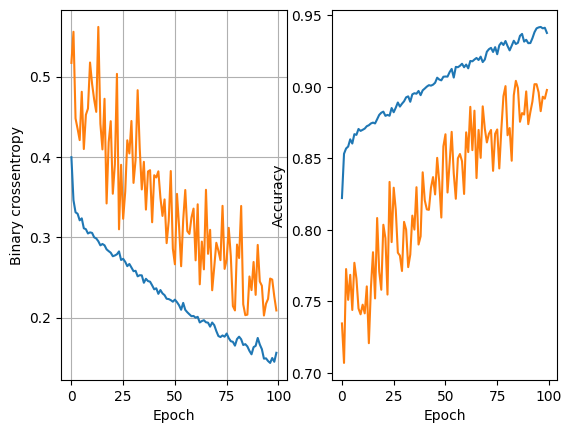

64 nn, dropout 0, lr 0.005, batch size 32


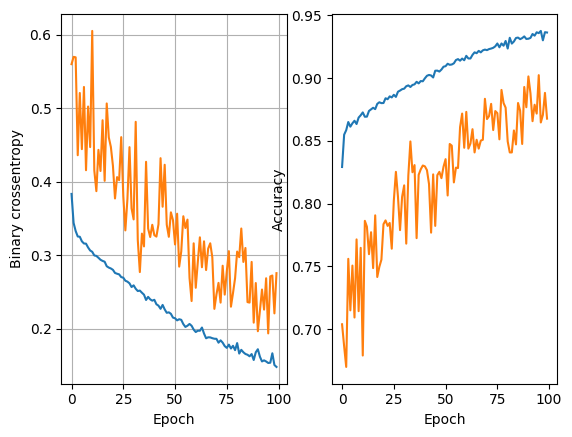

64 nn, dropout 0, lr 0.005, batch size 64


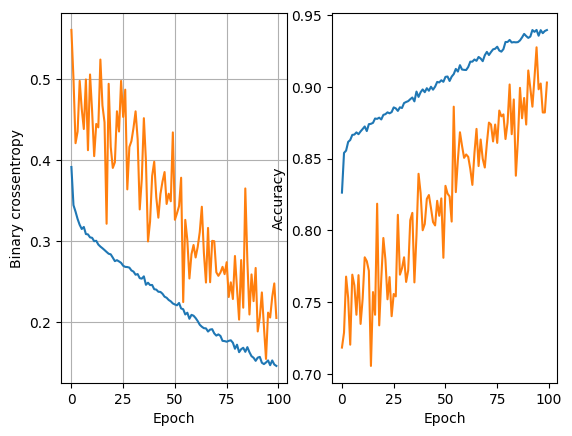

64 nn, dropout 0, lr 0.005, batch size 128


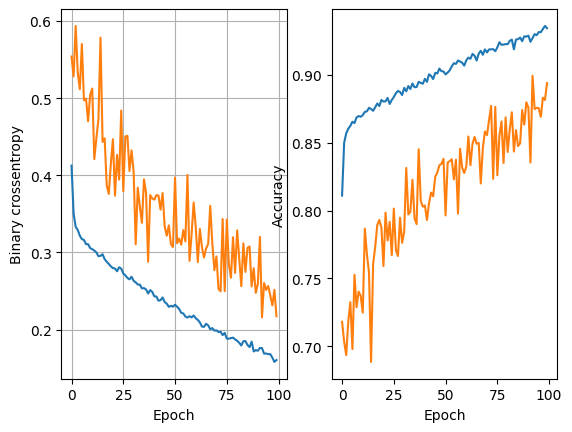

64 nn, dropout 0, lr 0.001, batch size 32


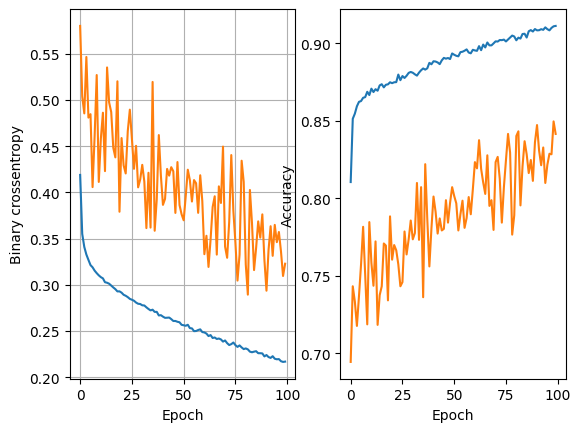

64 nn, dropout 0, lr 0.001, batch size 64


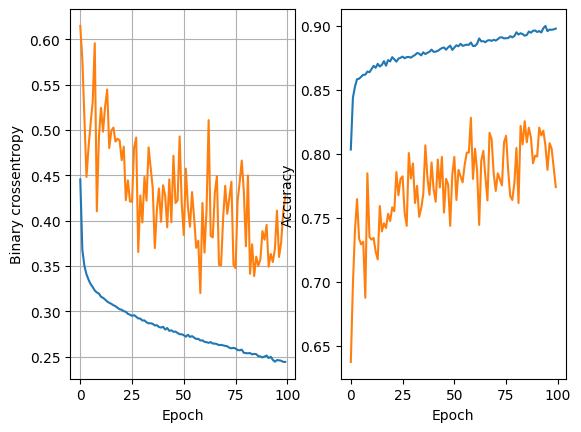

64 nn, dropout 0, lr 0.001, batch size 128


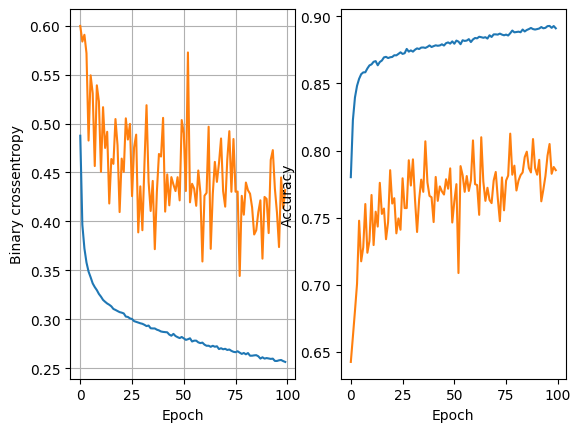

64 nn, dropout 0.2, lr 0.01, batch size 32


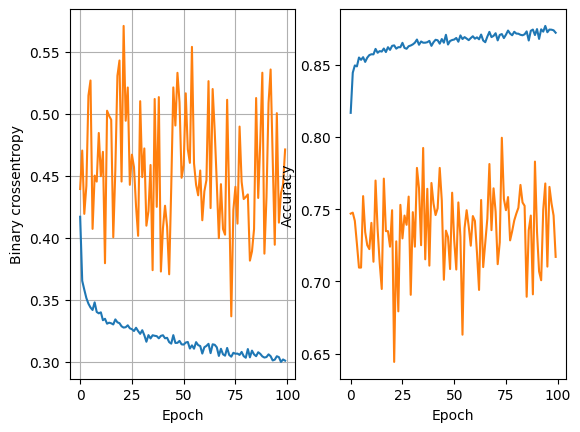

64 nn, dropout 0.2, lr 0.01, batch size 64


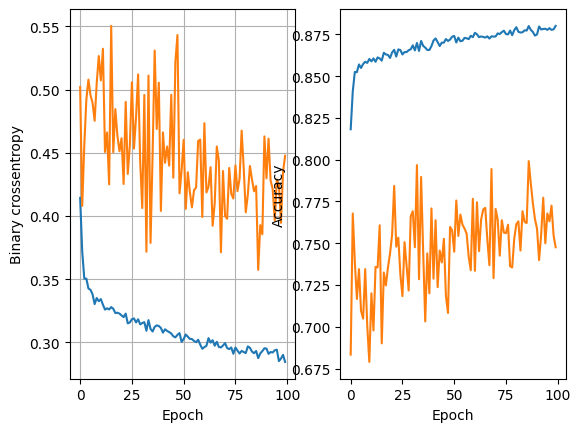

64 nn, dropout 0.2, lr 0.01, batch size 128


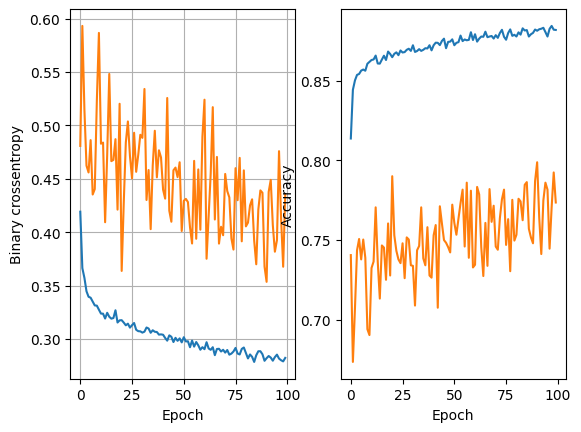

64 nn, dropout 0.2, lr 0.005, batch size 32


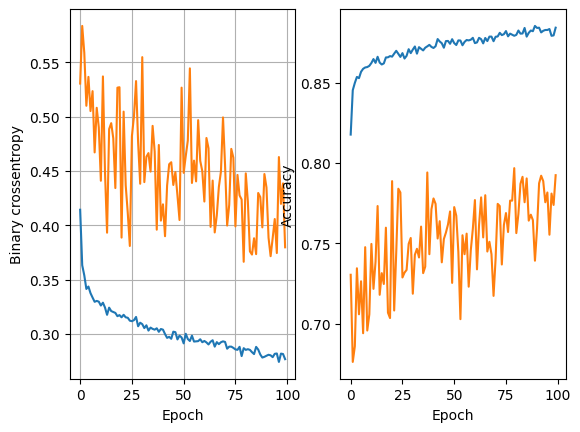

64 nn, dropout 0.2, lr 0.005, batch size 64


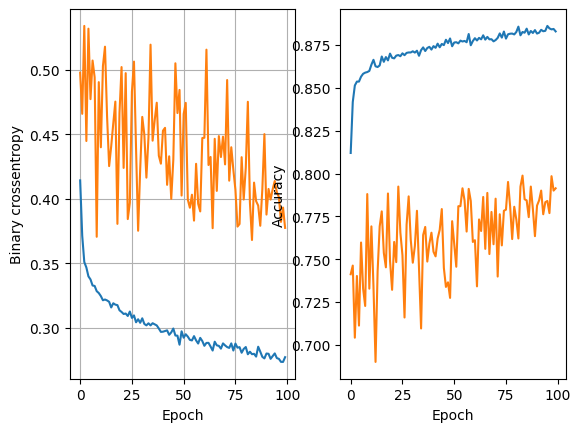

64 nn, dropout 0.2, lr 0.005, batch size 128


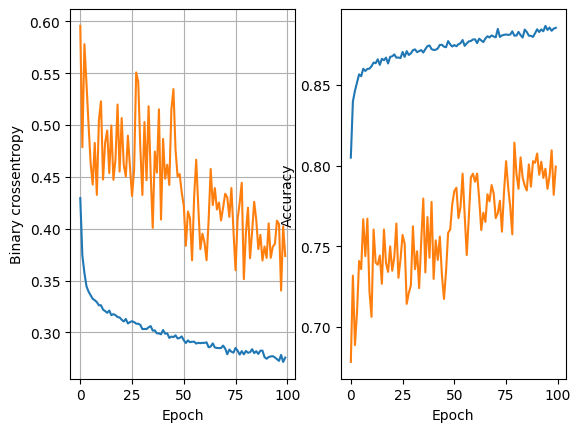

64 nn, dropout 0.2, lr 0.001, batch size 32


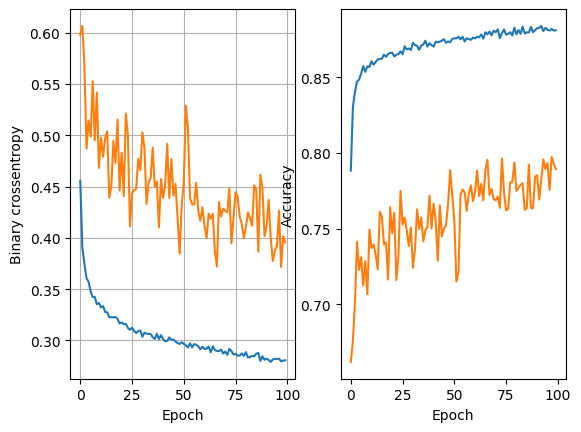

64 nn, dropout 0.2, lr 0.001, batch size 64


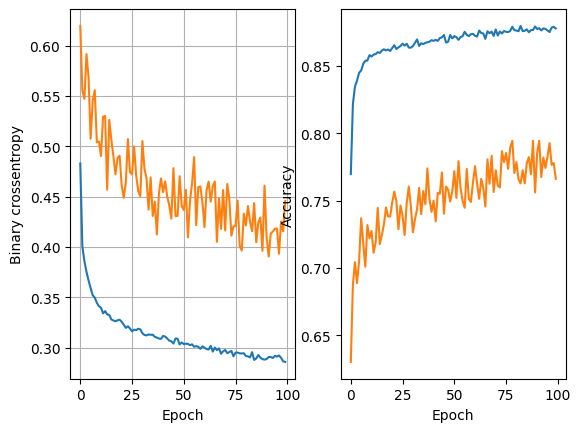

64 nn, dropout 0.2, lr 0.001, batch size 128


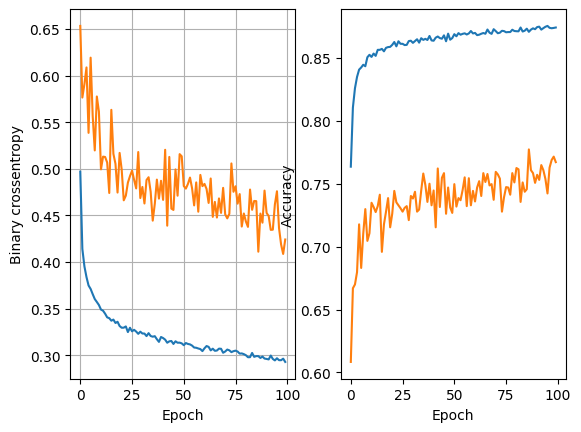

In [29]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100
for num_nodes in [16, 32, 64]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nn, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)

        val_loss = model.evaluate(X_valid, y_valid, verbose=0)
        if isinstance(val_loss, list):
            val_loss = val_loss[0]

        if val_loss < least_val_loss:
            least_val_loss = val_loss
            least_loss_model = model

In [30]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.76      0.82      1315
           1       0.88      0.95      0.91      2489

    accuracy                           0.88      3804
   macro avg       0.88      0.85      0.87      3804
weighted avg       0.88      0.88      0.88      3804

